In [1]:
# hide
# all_slow

In [2]:
# hide
# no_test
! [ -e /content ] && pip install -Uqq git+https://github.com/thinkingmachines/geowrangler.git

In [3]:
# hide
# no_test
!mkdir -p ../data
![ -e /content ] && ln -s ../data .

In [1]:
# hide
# no_test
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Geowrangler Overview - Ookla Demo

> Sample demo for using geowrangler to find the Philippine provinces/towns with the slowest/fastest internet speeds.  

## Summary

### How geowrangler can make this process easier
* Help you download Ookla data (internet speed)
* Generate zonal stats for your province/town

### What you need to do

* Get AOIs - get the boundaries of your admin regions


In [2]:
# hide
import warnings

warnings.filterwarnings(action="ignore", category=UserWarning, module="geopandas")

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geowrangler.area_zonal_stats as azs

In [27]:
import pandas as pd

pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

In [4]:
# hide
# no_test
!mkdir -p ../data
# download sample geojson files from repo
# ![ ! -e ../data/region3_population_bgy_level.geojson ] && curl -s -o ../data/region3_population_bgy_level.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler/master/data/region3_population_bgy_level.geojson

## Tutorial 

### Download Admin Areas

* Get [data from Humanitarian Data Exchange](https://data.humdata.org/dataset/cod-ab-phl)  

In [5]:
phl_admin3_file = "phl_adminboundaries_candidate_adm3"
phl_admin3_zip = f"{phl_admin3_file}.zip"
# shapefiles
phl_admin3_link = f"https://data.humdata.org/dataset/caf116df-f984-4deb-85ca-41b349d3f313/resource/12457689-6a86-4474-8032-5ca9464d38a8/download/{phl_admin3_zip}"

In [9]:
%%time
![ ! -e ../data/{phl_admin3_zip}] && -curl -L -o ../data/{phl_admin3_zip} {phl_admin3_link}

zsh:[:1: ']' expected
CPU times: user 8.34 ms, sys: 0 ns, total: 8.34 ms
Wall time: 111 ms


In [10]:
!mkdir -p ../data/{phl_admin3_file}

In [11]:
main_file = "phl_admbnda_adm3_psa_namria_20200529"
phl_admin3_shp = f"../data/{phl_admin3_file}/{main_file}.shp"

In [12]:
%%time
![ ! -e {phl_admin3_shp} ] && unzip -d ../data/{phl_admin3_file} ../data/{phl_admin3_zip}

CPU times: user 6.88 ms, sys: 788 µs, total: 7.66 ms
Wall time: 111 ms


In [13]:
%%time
admin3 = gpd.read_file(phl_admin3_shp)

CPU times: user 3.54 s, sys: 277 ms, total: 3.82 s
Wall time: 4 s


In [14]:
admin3.head()

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,1.601219,0.063496,Aborlan,PH175301000,None,None,None,Palawan,PH175300000,Region IV-B,PH170000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((118.58350 9.37700, 118.58398 9..."
1,1.078749,0.050232,Abra de Ilog,PH175101000,None,None,None,Occidental Mindoro,PH175100000,Region IV-B,PH170000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((120.58412 13.50198, 120.58420 13.501..."
2,0.424301,0.006453,Abucay,PH030801000,None,None,None,Bataan,PH030800000,Region III,PH030000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((120.49873 14.75614, 120.49891 14.755..."
3,0.566053,0.011343,Abulug,PH021501000,None,None,None,Cagayan,PH021500000,Region II,PH020000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((121.43455 18.46651, 121.43502 18.466..."
4,1.013649,0.026124,Abuyog,PH083701000,None,None,None,Leyte,PH083700000,Region VIII,PH080000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((125.02684 10.73500, 125.02683 ..."


In [15]:
list(admin3.columns.values)

['Shape_Leng',
 'Shape_Area',
 'ADM3_EN',
 'ADM3_PCODE',
 'ADM3_REF',
 'ADM3ALT1EN',
 'ADM3ALT2EN',
 'ADM2_EN',
 'ADM2_PCODE',
 'ADM1_EN',
 'ADM1_PCODE',
 'ADM0_EN',
 'ADM0_PCODE',
 'date',
 'validOn',
 'validTo',
 'geometry']

In [16]:
import matplotlib.pyplot as plt

CPU times: user 5.91 s, sys: 342 ms, total: 6.26 s
Wall time: 6 s


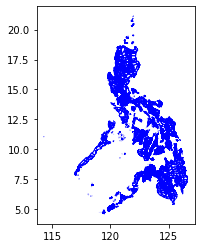

In [17]:
%%time
ax = plt.axes()
ax = admin3.plot(ax=ax, facecolor="none", edgecolor="blue")

CPU times: user 109 ms, sys: 32.5 ms, total: 142 ms
Wall time: 69.2 ms


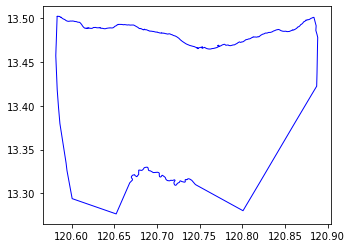

In [18]:
%%time
ax = plt.axes()
ax = admin3[admin3.ADM3_EN == "Abra de Ilog"].plot(
    ax=ax, facecolor="none", edgecolor="blue"
)

In [19]:
admin3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
admin3.total_bounds

array([114.27789225,   4.5872945 , 126.6049656 ,  21.12188548])

In [21]:
len(admin3)

1647

### Download Ookla data

In [22]:
from geowrangler.datasets import ookla

In [23]:
%%time
ookla_dsets = ookla.list_ookla_files()
ookla_dsets

CPU times: user 45.6 ms, sys: 0 ns, total: 45.6 ms
Wall time: 1.13 s


{OoklaQuarter(type='fixed', year='2019', quarter='1'): '2019-01-01_performance_fixed_tiles.parquet',
 OoklaQuarter(type='fixed', year='2019', quarter='2'): '2019-04-01_performance_fixed_tiles.parquet',
 OoklaQuarter(type='fixed', year='2019', quarter='3'): '2019-07-01_performance_fixed_tiles.parquet',
 OoklaQuarter(type='fixed', year='2019', quarter='4'): '2019-10-01_performance_fixed_tiles.parquet',
 OoklaQuarter(type='fixed', year='2020', quarter='1'): '2020-01-01_performance_fixed_tiles.parquet',
 OoklaQuarter(type='fixed', year='2020', quarter='2'): '2020-04-01_performance_fixed_tiles.parquet',
 OoklaQuarter(type='fixed', year='2020', quarter='3'): '2020-07-01_performance_fixed_tiles.parquet',
 OoklaQuarter(type='fixed', year='2020', quarter='4'): '2020-10-01_performance_fixed_tiles.parquet',
 OoklaQuarter(type='fixed', year='2021', quarter='1'): '2021-01-01_performance_fixed_tiles.parquet',
 OoklaQuarter(type='fixed', year='2021', quarter='2'): '2021-04-01_performance_fixed_tiles.

In [24]:
ookla_params = dict(year="2022", quarter="2", directory="../data")

In [25]:
%%time
ookla_fixed = ookla.download_ookla_file(type_="fixed", **ookla_params)

CPU times: user 301 µs, sys: 37 µs, total: 338 µs
Wall time: 247 µs


In [26]:
%%time
ookla_mobile = ookla.download_ookla_file(type_="mobile", **ookla_params)

CPU times: user 255 µs, sys: 31 µs, total: 286 µs
Wall time: 236 µs


In [27]:
ookla_fixed

PosixPath('../data/2022-04-01_performance_fixed_tiles.parquet')

In [28]:
import pandas as pd

In [29]:
%%time
fixed = pd.read_parquet(ookla_fixed)

CPU times: user 11.6 s, sys: 3.97 s, total: 15.6 s
Wall time: 7.49 s


In [30]:
len(fixed)

6581735

In [31]:
fixed.head()

,quadkey,tile,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices
0,2103111033100303,"POLYGON((-46.5545654296875 -22.9432183426273, ...",141501,51102,12,330,50
1,1321222320312200,"POLYGON((114.169921875 22.37039634432, 114.175...",228064,180981,5,915,191
2,1202033220030032,"POLYGON((8.536376953125 49.3143800480069, 8.54...",166267,17752,15,57,13
3,1231300223313122,"POLYGON((79.43115234375 29.6355459144667, 79.4...",42442,102038,16,14,7
4,2110000232002202,"POLYGON((-44.296875 -2.53152456690541, -44.291...",144393,52963,12,99,43


In [32]:
fixed.dtypes

quadkey       object
tile          object
avg_d_kbps     int64
avg_u_kbps     int64
avg_lat_ms     int64
tests          int64
devices        int64
dtype: object

In [33]:
%%time
fixed["geometry"] = gpd.GeoSeries.from_wkt(fixed.tile, crs="EPSG:4326")

CPU times: user 30.5 s, sys: 1.78 s, total: 32.3 s
Wall time: 32.1 s


In [34]:
fixed.head()

,quadkey,tile,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,2103111033100303,"POLYGON((-46.5545654296875 -22.9432183426273, ...",141501,51102,12,330,50,"POLYGON ((-46.55457 -22.94322, -46.54907 -22.9..."
1,1321222320312200,"POLYGON((114.169921875 22.37039634432, 114.175...",228064,180981,5,915,191,"POLYGON ((114.16992 22.37040, 114.17542 22.370..."
2,1202033220030032,"POLYGON((8.536376953125 49.3143800480069, 8.54...",166267,17752,15,57,13,"POLYGON ((8.53638 49.31438, 8.54187 49.31438, ..."
3,1231300223313122,"POLYGON((79.43115234375 29.6355459144667, 79.4...",42442,102038,16,14,7,"POLYGON ((79.43115 29.63555, 79.43665 29.63555..."
4,2110000232002202,"POLYGON((-44.296875 -2.53152456690541, -44.291...",144393,52963,12,99,43,"POLYGON ((-44.29688 -2.53152, -44.29138 -2.531..."


In [35]:
%%time
fixed.drop(columns=["tile"], inplace=True)

CPU times: user 184 ms, sys: 101 ms, total: 286 ms
Wall time: 284 ms


In [36]:
%%time
fixed = gpd.GeoDataFrame(fixed, geometry="geometry", crs="EPSG:4326")

CPU times: user 98 ms, sys: 50.2 ms, total: 148 ms
Wall time: 146 ms


### Validate AOI and Data Geoms

In [37]:
from geowrangler.validation import GeometryValidation

#### Validate AOI

In [38]:
admin3_gvm = GeometryValidation(admin3)

In [39]:
%%time
valid_admin3 = admin3_gvm.validate_all()

CPU times: user 1min 34s, sys: 604 ms, total: 1min 35s
Wall time: 1min 35s


In [40]:
(~valid_admin3.is_oriented_properly).sum(axis=None)

1647

In [41]:
(~valid_admin3.is_not_null).sum(axis=None)

0

In [42]:
(~valid_admin3.is_not_self_intersecting).sum(axis=None)

1

In [43]:
(~valid_admin3.is_within_crs_bounds).sum(axis=None)

0

In [44]:
(~valid_admin3.area_is_not_zero).sum(axis=None)

0

In [45]:
valid_admin3.drop(
    columns=[
        "is_not_null",
        "is_not_self_intersecting",
        "is_oriented_properly",
        "is_within_crs_bounds",
        "area_is_not_zero",
    ],
    inplace=True,
)

#### Validate Data

In [46]:
%%time
valid_admin3.geometry.sindex

CPU times: user 96.2 ms, sys: 0 ns, total: 96.2 ms
Wall time: 94.8 ms


In [47]:
%%time
fixed.geometry.sindex

CPU times: user 17.5 s, sys: 240 ms, total: 17.8 s
Wall time: 17.7 s


In [48]:
%%time
filtered_fixed = fixed.sjoin(
    valid_admin3[["geometry"]], how="inner", predicate="intersects"
)

CPU times: user 31.8 s, sys: 585 ms, total: 32.4 s
Wall time: 32.5 s


In [ ]:
# fixed_gvm = GeometryValidation(filtered_fixed)

In [ ]:
# %%time
# valid_fixed = fixed_gvm.validate_all()

In [ ]:
# %%time
# (~valid_fixed.is_oriented_properly).sum(axis=None)

In [ ]:
# (~valid_fixed.is_not_null).sum(axis=None)

In [ ]:
# (~valid_fixed.is_not_self_intersecting).sum(axis=None)

In [ ]:
# (~valid_fixed.is_within_crs_bounds).sum(axis=None)

In [ ]:
# (~valid_fixed.area_is_not_zero).sum(axis=None)


### Generate Zonal Stats


In [49]:
filtered_fixed.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,index_right
7,1323211310233201,113896,90254,22,24,7,"POLYGON ((123.18420 9.47074, 123.18970 9.47074...",52
110472,1323211310233020,49521,64266,7,14,7,"POLYGON ((123.17871 9.48157, 123.18420 9.48157...",52
166998,1323211310322232,95983,87376,10,29,7,"POLYGON ((123.23364 9.45448, 123.23914 9.45448...",52
307826,1323211310322202,70576,70898,13,32,14,"POLYGON ((123.22266 9.46532, 123.22815 9.46532...",52
329130,1323211310233322,20358,13538,8,49,8,"POLYGON ((123.20068 9.45448, 123.20618 9.45448...",52


In [50]:
list(filtered_fixed.columns.values)

['quadkey',
 'avg_d_kbps',
 'avg_u_kbps',
 'avg_lat_ms',
 'tests',
 'devices',
 'geometry',
 'index_right']

In [51]:
filtered_fixed.drop(columns=["index_right"], inplace=True)

In [52]:
len(filtered_fixed)

112010

In [54]:
%%time
valid_admin3 = valid_admin3.to_crs("EPSG:3857")

CPU times: user 4.22 s, sys: 220 ms, total: 4.44 s
Wall time: 4.44 s


In [55]:
%%time
filtered_fixed = filtered_fixed.to_crs("EPSG:3857")

CPU times: user 580 ms, sys: 30 ms, total: 610 ms
Wall time: 608 ms


In [58]:
%%time
valid_admin3.to_file("../data/valid_admin3.geojson", driver="GeoJSON")

CPU times: user 2min 14s, sys: 1.27 s, total: 2min 16s
Wall time: 2min 16s


In [59]:
%%time
filtered_fixed.to_file("../data/filtered_fixed.geojson", driver="GeoJSON")

CPU times: user 22.2 s, sys: 219 ms, total: 22.4 s
Wall time: 22.4 s


In [5]:
%%time
valid_admin3 = gpd.read_file("../data/valid_admin3.geojson")

CPU times: user 50.7 s, sys: 451 ms, total: 51.2 s
Wall time: 51.1 s


In [6]:
%%time
filtered_fixed = gpd.read_file("../data/filtered_fixed.geojson")

CPU times: user 7.53 s, sys: 90.1 ms, total: 7.62 s
Wall time: 7.6 s


In [7]:
funcs = ["mean", "min", "max", "std"]
columns = ["avg_d_kbps", "avg_u_kbps", "avg_lat_ms"]

In [8]:
aggregations = [dict(func=funcs, column=c) for c in columns]

In [9]:
aggregations

[{'func': ['mean', 'min', 'max', 'std'], 'column': 'avg_d_kbps'},
 {'func': ['mean', 'min', 'max', 'std'], 'column': 'avg_u_kbps'},
 {'func': ['mean', 'min', 'max', 'std'], 'column': 'avg_lat_ms'}]

In [10]:
%%time
aoi = azs.create_area_zonal_stats(
    valid_admin3, filtered_fixed, aggregations=aggregations
)

CPU times: user 8min 37s, sys: 15.9 ms, total: 8min 38s
Wall time: 8min 38s



### Analyze Zonal Stats


In [26]:
aoi.head()

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,intersect_area_sum,avg_d_kbps_mean,avg_d_kbps_min,avg_d_kbps_max,avg_d_kbps_std,avg_u_kbps_mean,avg_u_kbps_min,avg_u_kbps_max,avg_u_kbps_std,avg_lat_ms_mean,avg_lat_ms_min,avg_lat_ms_max,avg_lat_ms_std
0,1.601219,0.063496,Aborlan,PH175301000,None,None,None,Palawan,PH175300000,Region IV-B,PH170000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((13200654.486 1048534.319, 1320...",9.854986e+06,23.046103,0.0,203322.0,55245.906786,27.819618,0.0,358739.0,82672.053338,0.018618,0.0,85.0,16.834093
1,1.078749,0.050232,Abra de Ilog,PH175101000,None,None,None,Occidental Mindoro,PH175100000,Region IV-B,PH170000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((13423362.388 1517141.304, 13423357.8...",4.936853e+06,2.860318,0.0,45646.0,14268.619735,3.903081,0.0,45887.0,13957.743767,0.010536,0.0,50.0,12.637906
2,0.424301,0.006453,Abucay,PH030801000,None,None,None,Bataan,PH030800000,Region III,PH030000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((13413856.918 1661111.879, 13413828.5...",2.623661e+07,185.766109,0.0,173083.0,38251.942012,159.495345,0.0,124838.0,29400.199469,0.041733,0.0,100.0,16.147136
3,0.566053,0.011343,Abulug,PH021501000,None,None,None,Cagayan,PH021500000,Region II,PH020000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((13518031.782 2092225.344, 13517997.6...",2.918788e+07,109.308588,0.0,196266.0,47442.968071,120.987768,0.0,185160.0,49287.434137,0.076236,0.0,397.0,46.589298
4,1.013649,0.026124,Abuyog,PH083701000,None,None,None,Leyte,PH083700000,Region VIII,PH080000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((13917924.351 1202068.549, 1391...",2.717855e+07,26.219262,0.0,312344.0,46020.941506,19.246952,0.0,236599.0,35943.301522,0.038354,0.0,171.0,35.779096


In [12]:
%%time
aoi.to_file("../data/admin3_internet_aoi.geojson", driver="GeoJSON")

CPU times: user 2min 9s, sys: 560 ms, total: 2min 9s
Wall time: 2min 9s


In [13]:
list(aoi.columns.values)

['Shape_Leng',
 'Shape_Area',
 'ADM3_EN',
 'ADM3_PCODE',
 'ADM3_REF',
 'ADM3ALT1EN',
 'ADM3ALT2EN',
 'ADM2_EN',
 'ADM2_PCODE',
 'ADM1_EN',
 'ADM1_PCODE',
 'ADM0_EN',
 'ADM0_PCODE',
 'date',
 'validOn',
 'validTo',
 'geometry',
 'intersect_area_sum',
 'avg_d_kbps_mean',
 'avg_d_kbps_min',
 'avg_d_kbps_max',
 'avg_d_kbps_std',
 'avg_u_kbps_mean',
 'avg_u_kbps_min',
 'avg_u_kbps_max',
 'avg_u_kbps_std',
 'avg_lat_ms_mean',
 'avg_lat_ms_min',
 'avg_lat_ms_max',
 'avg_lat_ms_std']

In [14]:
%%time
fastest_mean_download = aoi.sort_values("avg_d_kbps_mean", ascending=False)

CPU times: user 3.71 ms, sys: 17 µs, total: 3.73 ms
Wall time: 3.23 ms


In [16]:
len(fastest_mean_download)

1647

In [15]:
fastest_mean_download.iloc[0]

Shape_Leng                                                     0.037803
Shape_Area                                                     0.000056
ADM3_EN                                                         Binondo
ADM3_PCODE                                                  PH133902000
ADM3_REF                                                           None
ADM3ALT1EN                                                         None
ADM3ALT2EN                                                         None
ADM2_EN                             NCR, City of Manila, First District
ADM2_PCODE                                                  PH133900000
ADM1_EN                                         National Capital Region
ADM1_PCODE                                                  PH130000000
ADM0_EN                                               Philippines (the)
ADM0_PCODE                                                           PH
date                                                         201

In [17]:
fastest_mean_download.head()

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,...,avg_d_kbps_max,avg_d_kbps_std,avg_u_kbps_mean,avg_u_kbps_min,avg_u_kbps_max,avg_u_kbps_std,avg_lat_ms_mean,avg_lat_ms_min,avg_lat_ms_max,avg_lat_ms_std
211,0.037803,0.000056,Binondo,PH133902000,None,None,None,"NCR, City of Manila, First District",PH133900000,National Capital Region,...,97827.0,4141.081774,12152.916247,0.0,80923.0,5625.791089,1.228832,0.0,8.0,0.923381
1343,0.053487,0.000078,San Nicolas,PH133904000,None,None,None,"NCR, City of Manila, First District",PH133900000,National Capital Region,...,102244.0,7120.360056,9006.193022,0.0,86747.0,7700.042780,0.704346,0.0,8.0,1.506245
1192,0.037150,0.000074,Quiapo,PH133903000,None,None,None,"NCR, City of Manila, First District",PH133900000,National Capital Region,...,98873.0,10795.824603,8118.883151,0.0,80923.0,6614.199092,0.918342,0.0,9.0,0.907896
1336,0.048487,0.000076,San Miguel,PH133907000,None,None,None,"NCR, City of Manila, First District",PH133900000,National Capital Region,...,98873.0,9888.900686,6668.758487,0.0,80182.0,7787.458224,0.768447,0.0,11.0,1.742236
1112,0.068193,0.000135,Pateros,PH137606000,None,None,None,"NCR, Fourth District",PH137600000,National Capital Region,...,111250.0,14222.228691,7589.466134,0.0,111699.0,16454.487517,0.653218,0.0,22.0,6.301402


In [24]:
fastest_mean_download.tail()

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,intersect_area_sum,avg_d_kbps_mean,avg_d_kbps_min,avg_d_kbps_max,avg_d_kbps_std,avg_u_kbps_mean,avg_u_kbps_min,avg_u_kbps_max,avg_u_kbps_std,avg_lat_ms_mean,avg_lat_ms_min,avg_lat_ms_max,avg_lat_ms_std
1519,0.621201,0.014129,Tagoloan II,PH153638000,None,None,None,Lanao del Sur,PH153600000,Autonomous Region in Muslim Mindanao,PH150000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((13857518.824 911259.513, 13857500.76...",NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
1547,0.905010,0.028804,Tanudan,PH143214000,None,None,None,Kalinga,PH143200000,Cordillera Administrative Region,PH140000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((13498714.679 1965318.258, 13498503.1...",NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
1550,1.006230,0.004595,Tapul,PH156614000,None,None,None,Sulu,PH156600000,Autonomous Region in Muslim Mindanao,PH150000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((13471082.025 633930.674, 13471...",NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
1590,0.351303,0.003688,Tubaran,PH153628000,None,None,None,Lanao del Sur,PH153600000,Autonomous Region in Muslim Mindanao,PH150000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((13821976.978 867596.319, 13821917.49...",NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
1610,0.184227,0.000283,Turtle Islands,PH157008000,None,None,None,Tawi-Tawi,PH157000000,Autonomous Region in Muslim Mindanao,PH150000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((13171068.340 678847.566, 13171...",NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN


In [25]:
fastest_mean_download[fastest_mean_download.avg_d_kbps_mean.notna()].tail()

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,intersect_area_sum,avg_d_kbps_mean,avg_d_kbps_min,avg_d_kbps_max,avg_d_kbps_std,avg_u_kbps_mean,avg_u_kbps_min,avg_u_kbps_max,avg_u_kbps_std,avg_lat_ms_mean,avg_lat_ms_min,avg_lat_ms_max,avg_lat_ms_std
956,0.817275,0.031173,Matuguinao,PH086011000,None,None,None,Samar,PH086000000,Region VIII,PH080000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((13931722.896 1378185.002, 13931222.5...",3.739276e+05,1.013307,0.0,1071.0,NaN,1.216725,0.0,1286.0,NaN,0.966000,0.0,1021.0,NaN
852,1.082705,0.039482,Maconacon,PH023117000,None,None,None,Isabela,PH023100000,Region II,PH020000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((13598700.671 1989130.951, 13597718.7...",7.478553e+05,0.918390,0.0,1475.0,304.763023,1.488602,0.0,2263.0,313.248304,0.456825,0.0,644.0,24.748737
267,0.806511,0.038541,Butig,PH153607000,None,None,None,Lanao del Sur,PH153600000,Autonomous Region in Muslim Mindanao,PH150000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((13839648.414 869312.150, 13839602.78...",1.121783e+06,0.677109,0.0,1206.0,357.567243,0.383298,0.0,1036.0,469.539136,0.123628,0.0,243.0,72.459184
1568,1.218906,0.063444,Tineg,PH140125000,None,None,None,Abra,PH140100000,Cordillera Administrative Region,PH140000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((13465327.328 2032103.818, 13464797.0...",3.739276e+05,0.134018,0.0,296.0,NaN,1.649418,0.0,3643.0,NaN,0.307879,0.0,680.0,NaN
823,0.778690,0.021027,Lumba-Bayabao,PH153611000,None,None,None,Lanao del Sur,PH153600000,Autonomous Region in Muslim Mindanao,PH150000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((13849062.033 879842.145, 13849...",1.054767e+04,0.069545,0.0,5202.0,0.000000,0.085080,0.0,6364.0,0.000000,0.000642,0.0,48.0,0.000000


### Additional Exercises

* Repeat the same process to find the fastest and slowest **mobile** internet speeds
* Aggregate by adm2 level instead of adm3
